In [43]:
#import packages first 
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Project 2 Exploratory Data Science MLB Hitting Data Analysis

### Assignment Details

This will be the first section of your notebook. In it, you will clean your data and perform exploratory data analysis (EDA). You will be graded on the thoroughness of your work and assigned a letter grade from A-F. There is no pre-determined length of this component (or any component of the project), I just want to see that you have thoroughly explored the elements of your data that you find most interesting. By this I mean:

1. **Evaluate your variables: are they formatted correctly; do they have any anomalies; how much data are you missing.**
2. **Clean the data accordingly.**
3. **Evaluate associations and structure in the data at a bird’s eye view. Use some combination of visualization, summary statistics, and unsupervised learning techniques.**
4. **Explain what initial impressions from the data you’ve gathered based on your EDA**

### Exploratory Data Science 

This project analyzes Major League Baseball (MLB) hitting data to uncover trends, patterns, and insights related to team performance and hitting statistics. The focus is on contemporary team and salary data sourced from Lahman Baseball Reference. Statistics have become increasingly vital in baseball, often serving as the foundation for decisions about acquiring players. Identifying key metrics that contribute to team success can help teams target specific attributes in prospects or new players, optimizing their chances of winning games.

### Objectives

The key objectives of this project are:
1. Identify factors contributing to hitting success by analyzing various metrics.
2. Explore trends in a "birds eye view" across recent seasons.
3. Examine relationships between hitting statistics to understand how they correlate with one another.

### Data Science Concepts

The data used in this EDA is sourced from "Lahman" baseball reference website. The EDA includes:
- **Data Cleaning**: Preparing the data by handling missing values and standardizing formats.
- **Feature Engineering**: Creating new variables or aggregating data to add value to the dataset.
- **Variable Evaluation**: Check data for correct formatting, possible anomalies, missing data, etc.
- **Statistical Analysis and Visualization**: Using visualization reveal trends and relationships.

In [3]:
# Read in data using pandas.read_csv

salary = pd.read_csv("data/Salaries.csv", encoding='ISO-8859-1')
people = pd.read_csv("data/People.csv", encoding='ISO-8859-1')
batting = pd.read_csv("data/Batting.csv", encoding='ISO-8859-1')
team_franchise = pd.read_csv("data/TeamsFranchises.csv", encoding='ISO-8859-1')
teams = pd.read_csv("data/Teams.csv", encoding='ISO-8859-1')

In [40]:
# Filter data to only active franchises

active_franchise = team_franchise[team_franchise["active"]=="Y"]
active_franchise.head()

,franchID,franchName,active,NAassoc
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
4,ATL,Atlanta Braves,Y,BNA
5,BAL,Baltimore Orioles,Y,NaN
13,BOS,Boston Red Sox,Y,NaN


In [53]:
active_teams = teams[teams["franchID"].isin(active_franchise["franchID"])]
earliest_year = active_teams["yearID"].min()

# When have all active franchises joined the MLB?
last_year_join = active_teams[active_teams["franchID"] == "ARI"]["yearID"].min()
active_teams_1998 = active_teams[active_teams["yearID"] >= 1998]

# 1998 to 2023 is when the most relevant data is available including all active franchises
# Calculate win percent and compare the trend with playoff birth 
active_teams_1998['Win%'] = active_teams_1998["W"]/active_teams_1998["G"]
active_teams_1998.head()

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_21074/2364204332.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_teams_1998['Win%'] = active_teams_1998["W"]/active_teams_1998["G"]


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro,Win%
2265,1998,AL,ANA,ANA,W,2,162,81.0,85,77,...,0.983,Anaheim Angels,Edison International Field,2519280.0,102,102,ANA,ANA,ANA,0.524691
2266,1998,AL,BAL,BAL,E,4,162,81.0,79,83,...,0.987,Baltimore Orioles,Oriole Park at Camden Yards,3684650.0,98,97,BAL,BAL,BAL,0.487654
2267,1998,AL,BOS,BOS,E,2,162,81.0,92,70,...,0.983,Boston Red Sox,Fenway Park II,2314704.0,102,101,BOS,BOS,BOS,0.567901
2268,1998,AL,CHA,CHW,C,2,163,81.0,80,82,...,0.977,Chicago White Sox,Comiskey Park II,1391146.0,98,98,CHW,CHA,CHA,0.490798
2269,1998,AL,CLE,CLE,C,1,162,81.0,89,73,...,0.982,Cleveland Indians,Jacobs Field,3467299.0,103,102,CLE,CLE,CLE,0.549383


/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_21074/1953493962.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_teams_1998['MadePlayoffs'] = active_teams_1998[['DivWin', 'WCWin', 'LgWin']].apply(lambda x: 1 if 'Y' in x.values else 0, axis=1)


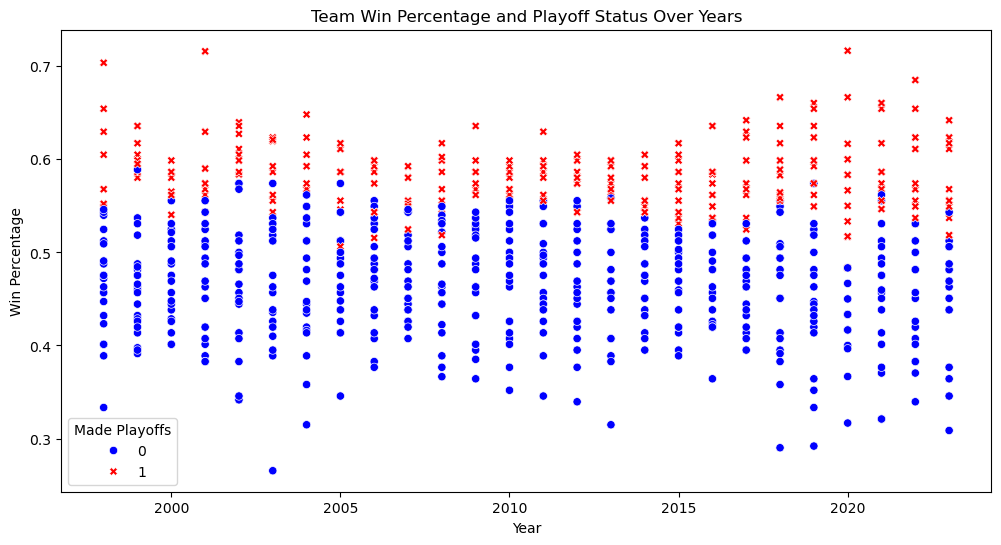

In [117]:
# Add a new column 'MadePlayoffs' to indicate if a team made the playoffs
active_teams_1998['MadePlayoffs'] = active_teams_1998[['DivWin', 'WCWin', 'LgWin']].apply(lambda x: 1 if 'Y' in x.values else 0, axis=1)

# Plot win percentage with playoff status as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=active_teams_1998, x='yearID', y='Win%', hue='MadePlayoffs', style='MadePlayoffs', palette={1: 'red', 0: 'blue'}, marker='o')
plt.title('Team Win Percentage and Playoff Status Over Years')
plt.xlabel('Year')
plt.ylabel('Win Percentage')
plt.legend(title='Made Playoffs')
plt.show()

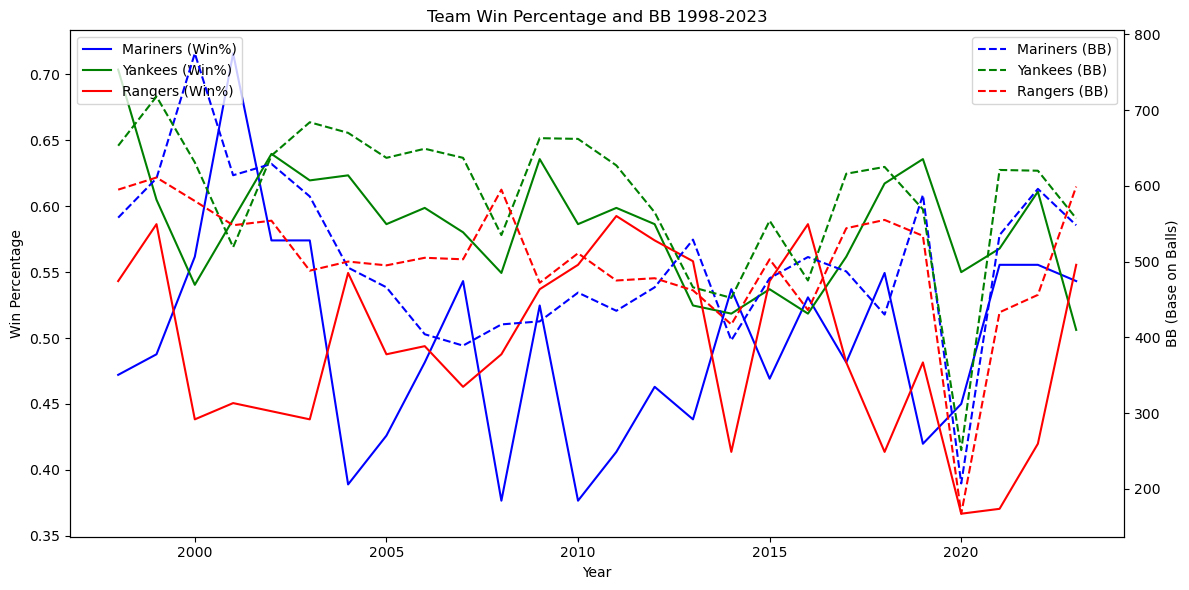

In [119]:
# Lets choose 3 random teams and see the relation walks might have with win pct
# Filter data for the three teams
SEA_data = active_teams_1998[active_teams_1998['franchID'] == "SEA"]
NYY_data = active_teams_1998[active_teams_1998['franchID'] == "NYY"]
TEX_data = active_teams_1998[active_teams_1998['franchID'] == "TEX"]

# Create subplots for Win Percentage and BB
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Win Percentage
sns.lineplot(data=SEA_data, x="yearID", y="Win%", label="Mariners (Win%)", ax=ax1, color="blue")
sns.lineplot(data=NYY_data, x="yearID", y="Win%", label="Yankees (Win%)", ax=ax1, color="green")
sns.lineplot(data=TEX_data, x="yearID", y="Win%", label="Rangers (Win%)", ax=ax1, color="red")
ax1.set_title('Team Win Percentage and BB 1998-2023')
ax1.set_xlabel('Year')
ax1.set_ylabel('Win Percentage')
ax1.legend(loc="upper left")

# Add a secondary y-axis for BB
ax2 = ax1.twinx()
sns.lineplot(data=SEA_data, x="yearID", y="BB", label="Mariners (BB)", ax=ax2, color="blue", linestyle="dashed")
sns.lineplot(data=NYY_data, x="yearID", y="BB", label="Yankees (BB)", ax=ax2, color="green", linestyle="dashed")
sns.lineplot(data=TEX_data, x="yearID", y="BB", label="Rangers (BB)", ax=ax2, color="red", linestyle="dashed")
ax2.set_ylabel('BB (Base on Balls)')
ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

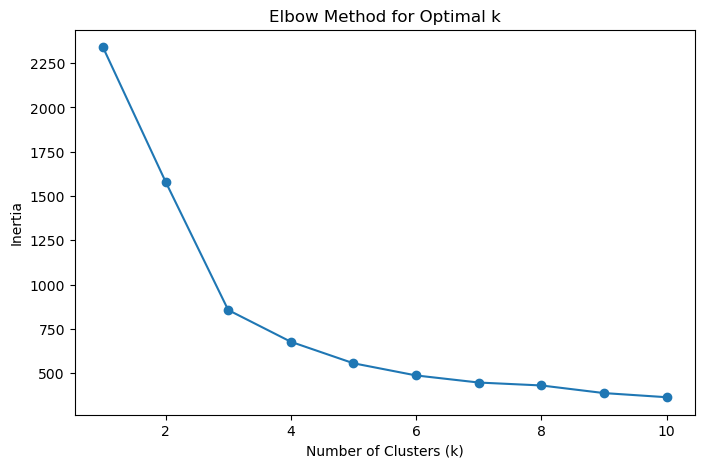

In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# features to be used for clustering 
features = active_teams_1998[['Win%', 'R', 'BB']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# plot curve in order to select the amount of optimal number of clusters to make 
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [172]:
# k-means with the optimal number of clusters
# I chose 3 because the graph goes from steep to flat at that cluster value
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)
active_teams_1998['Cluster'] = kmeans.labels_
print(active_teams_1998[['franchID', 'Win%', 'R', 'BB', 'Cluster']])

     franchID      Win%    R   BB  Cluster
2265      ANA  0.524691  787  510        2
2266      BAL  0.487654  817  593        2
2267      BOS  0.567901  876  541        2
2268      CHW  0.490798  861  551        2
2269      CLE  0.549383  850  630        2
...       ...       ...  ...  ...      ...
3040      PIT  0.469136  692  556        0
3041      SDP  0.506173  752  653        2
3042      SFG  0.487654  674  544        0
3043      STL  0.438272  719  570        0
3044      WSN  0.438272  700  423        0

[780 rows x 5 columns]


/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_21074/24543317.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_teams_1998['Cluster'] = kmeans.labels_


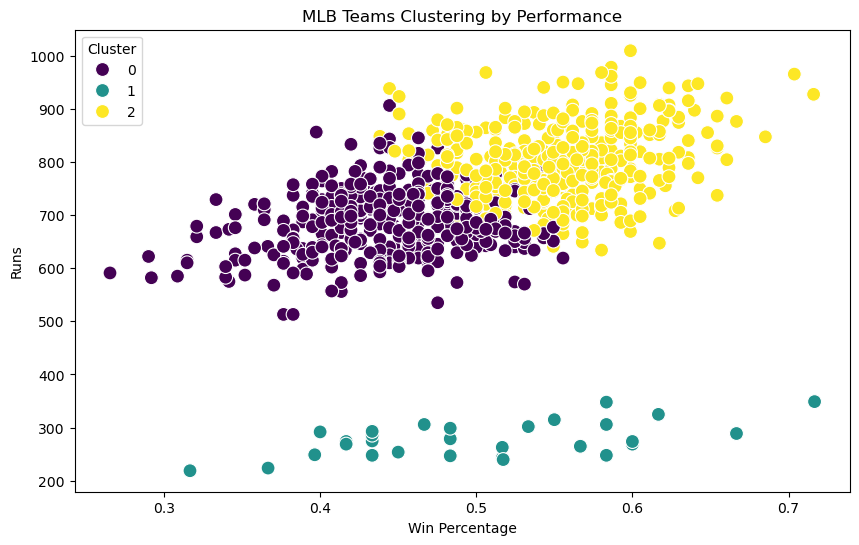

In [170]:
# scatterplot to visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=active_teams_1998,
    x='Win%',
    y='R',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('MLB Teams Clustering by Performance')
plt.xlabel('Win Percentage')
plt.ylabel('Runs')
plt.legend(title='Cluster')
plt.show()

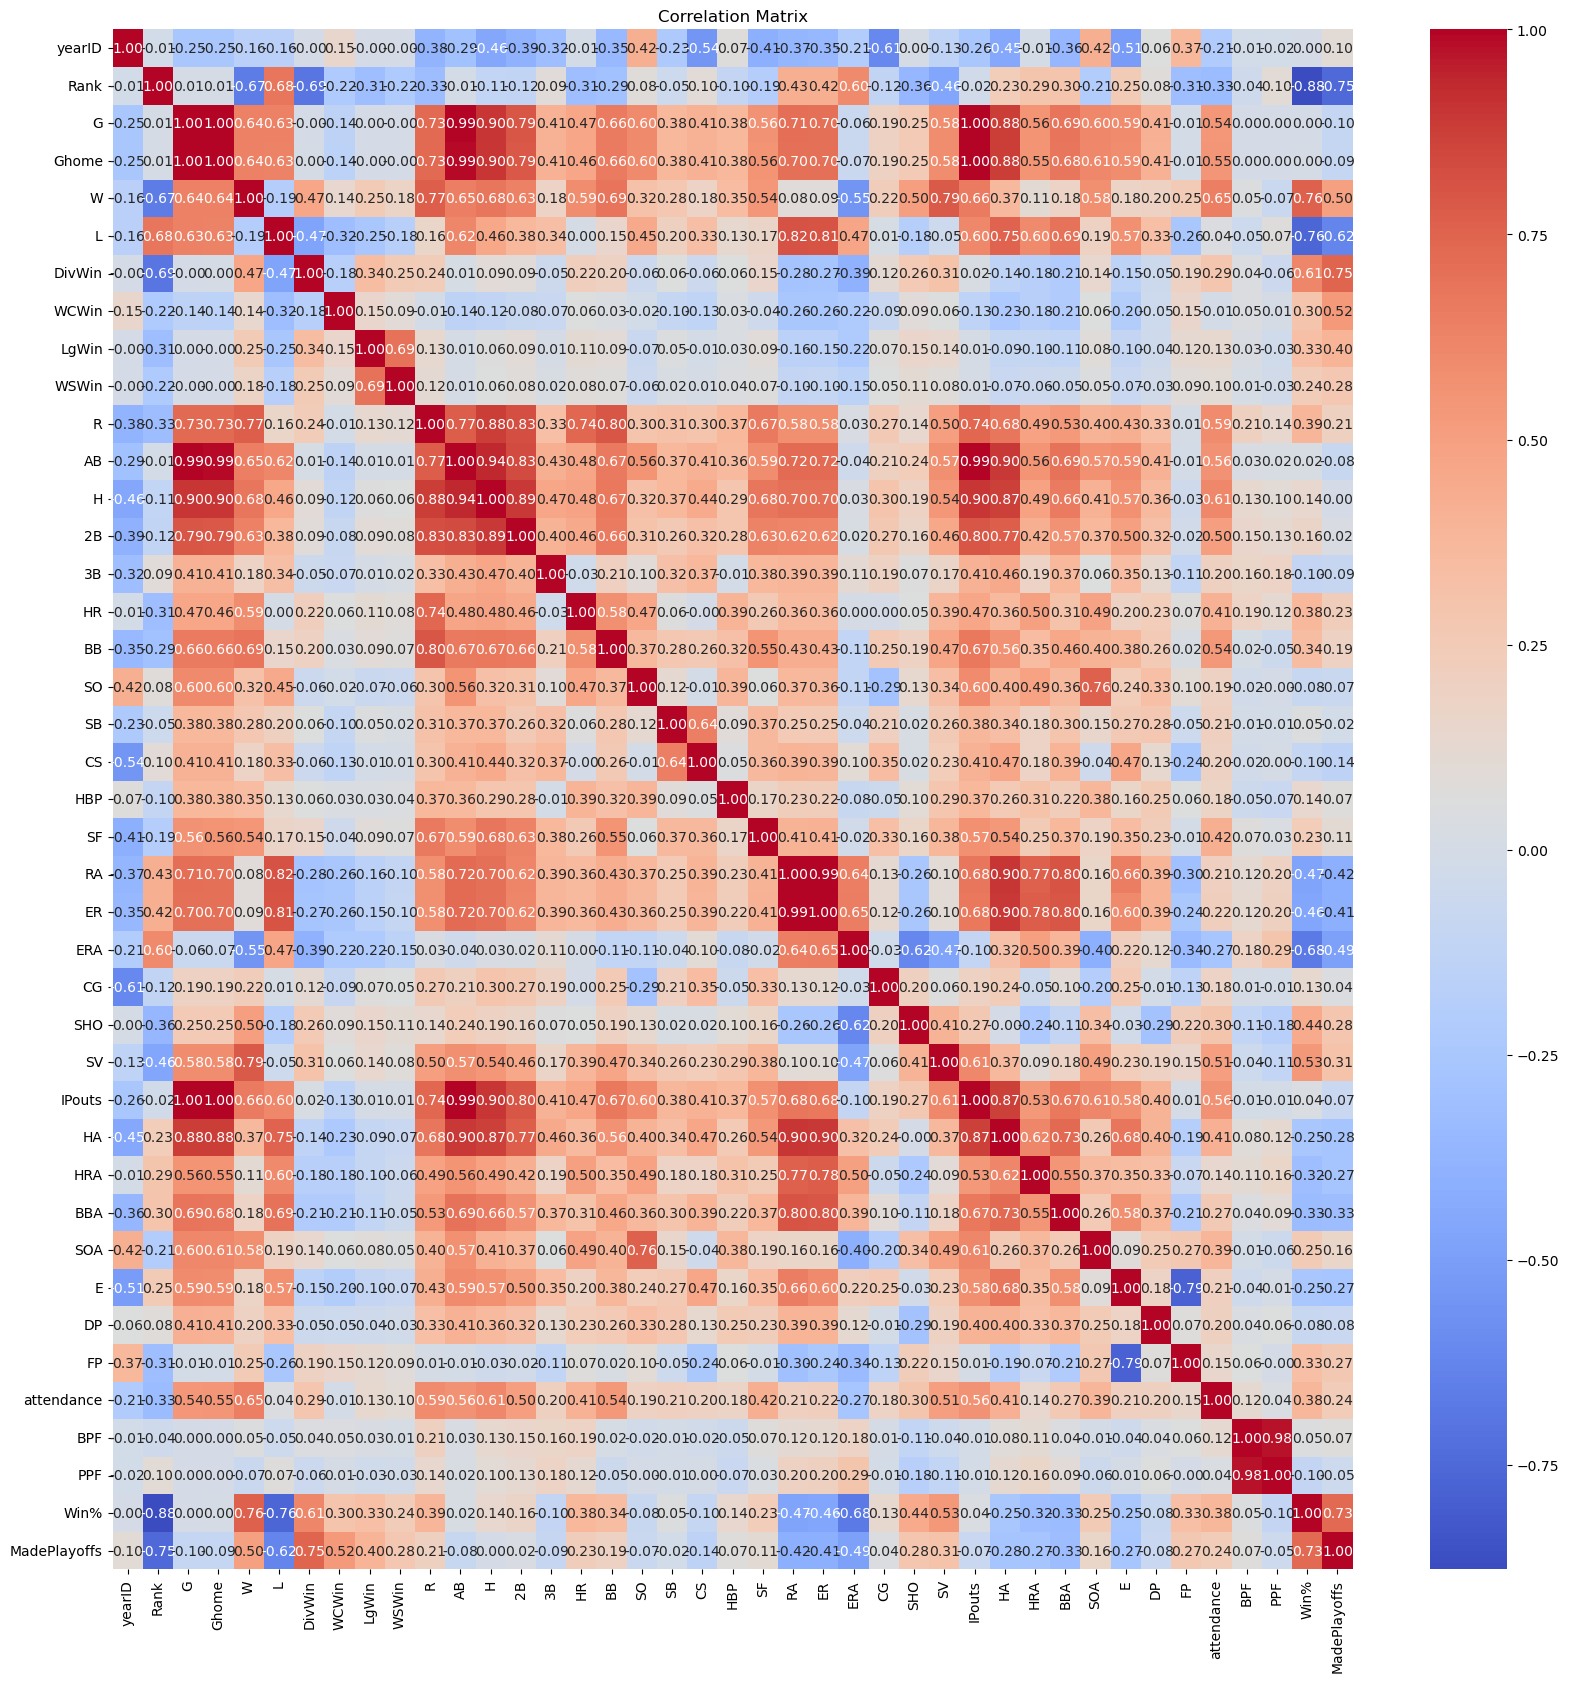

In [71]:
# correlation matrix
correlation_matrix = numerical_active_teams_1998.corr()
# visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Potential findings and flaws with the heat map
Predictors such as GHome, IPOut, AB, BPF, and PPF, which are inversely or directly related to one another, often exhibit extreme correlations that can mislead analysis. Therefore, these variables should be excluded from further consideration. In contrast, more meaningful predictors include walks, and doubles (2B) in relation to win percentage. These metrics align intuitively with baseball strategy. For example, reaching second base, often referred to as being in "scoring position," significantly increases the likelihood of scoring a run with a single hit to the outfield. This ability to capitalize on scoring opportunities directly impacts a team’s chances of winning games.

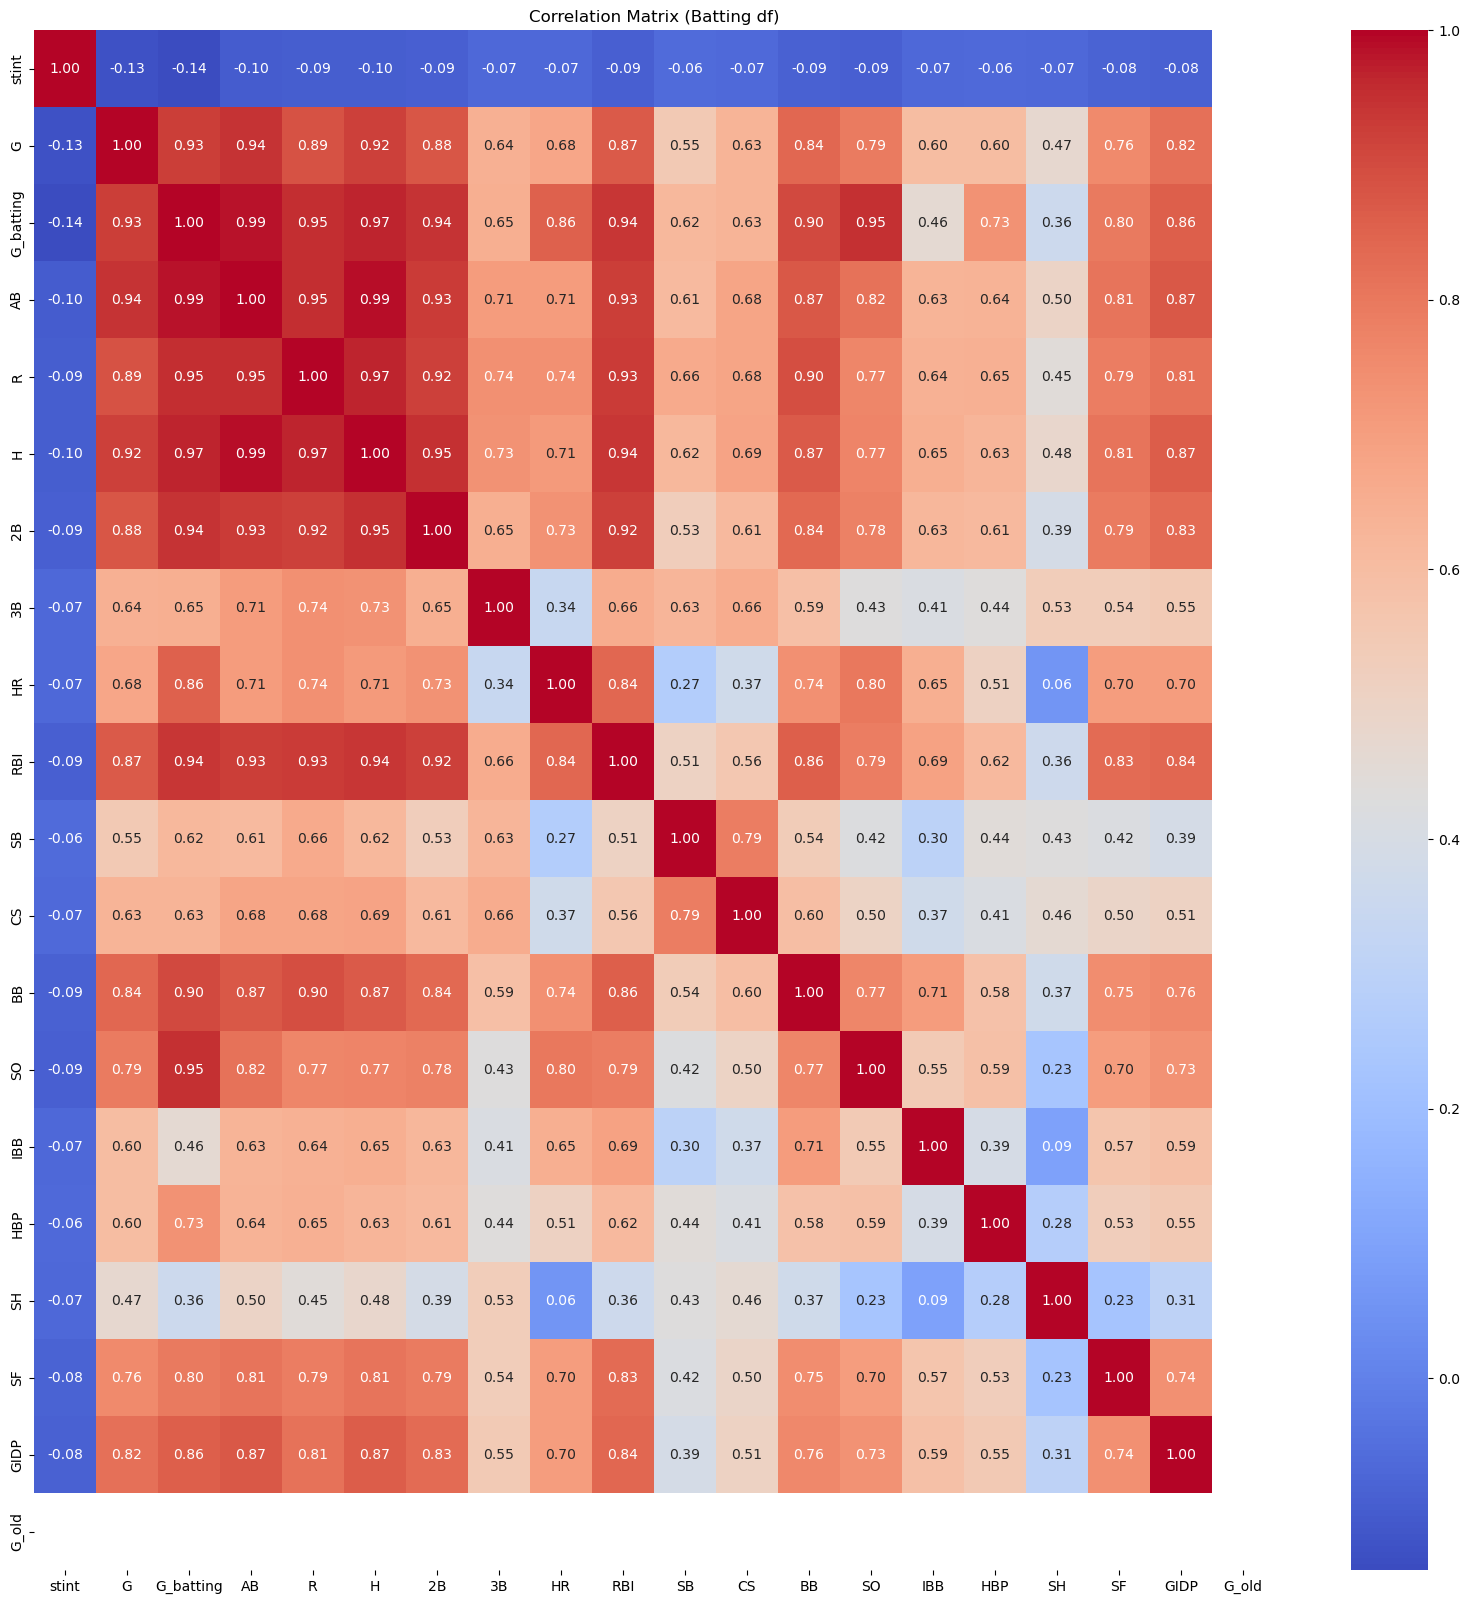

In [133]:
# correlation matrix
# what makes a good hitter?
batting['yearID'] = batting['yearID'].astype(int)
numerical_batting_data = batting[batting['yearID']>=1997]
numerical_batting_data = batting.drop(['playerID', 'yearID', 'teamID','lgID'], axis=1)
correlation_matrix_batting = numerical_batting_data .corr()
# visualize the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix_batting, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Batting df)')
plt.show()

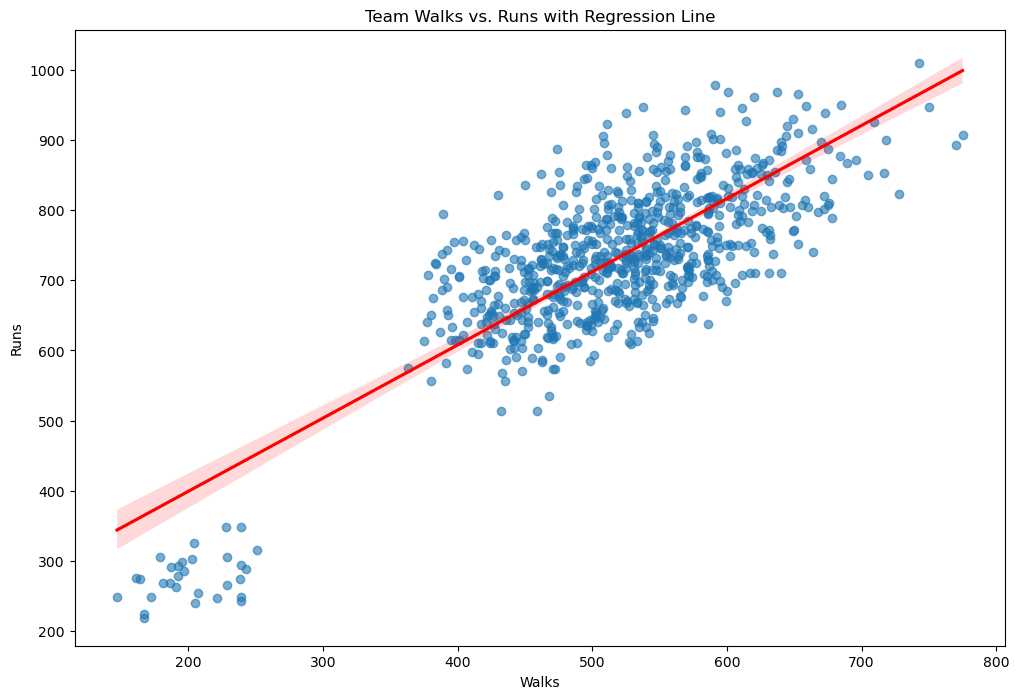

In [81]:
# lets look at walks and runs and see how they are related on a scatterplot
walks = numerical_active_teams_1998['BB']
runs = numerical_active_teams_1998['R']

plt.figure(figsize=(12, 8))
sns.regplot(data=numerical_active_teams_1998, x='BB', y='R', scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Team Walks vs. Runs with Regression Line')
plt.xlabel('Walks')
plt.ylabel('Runs')
plt.show()

In [12]:
salary.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


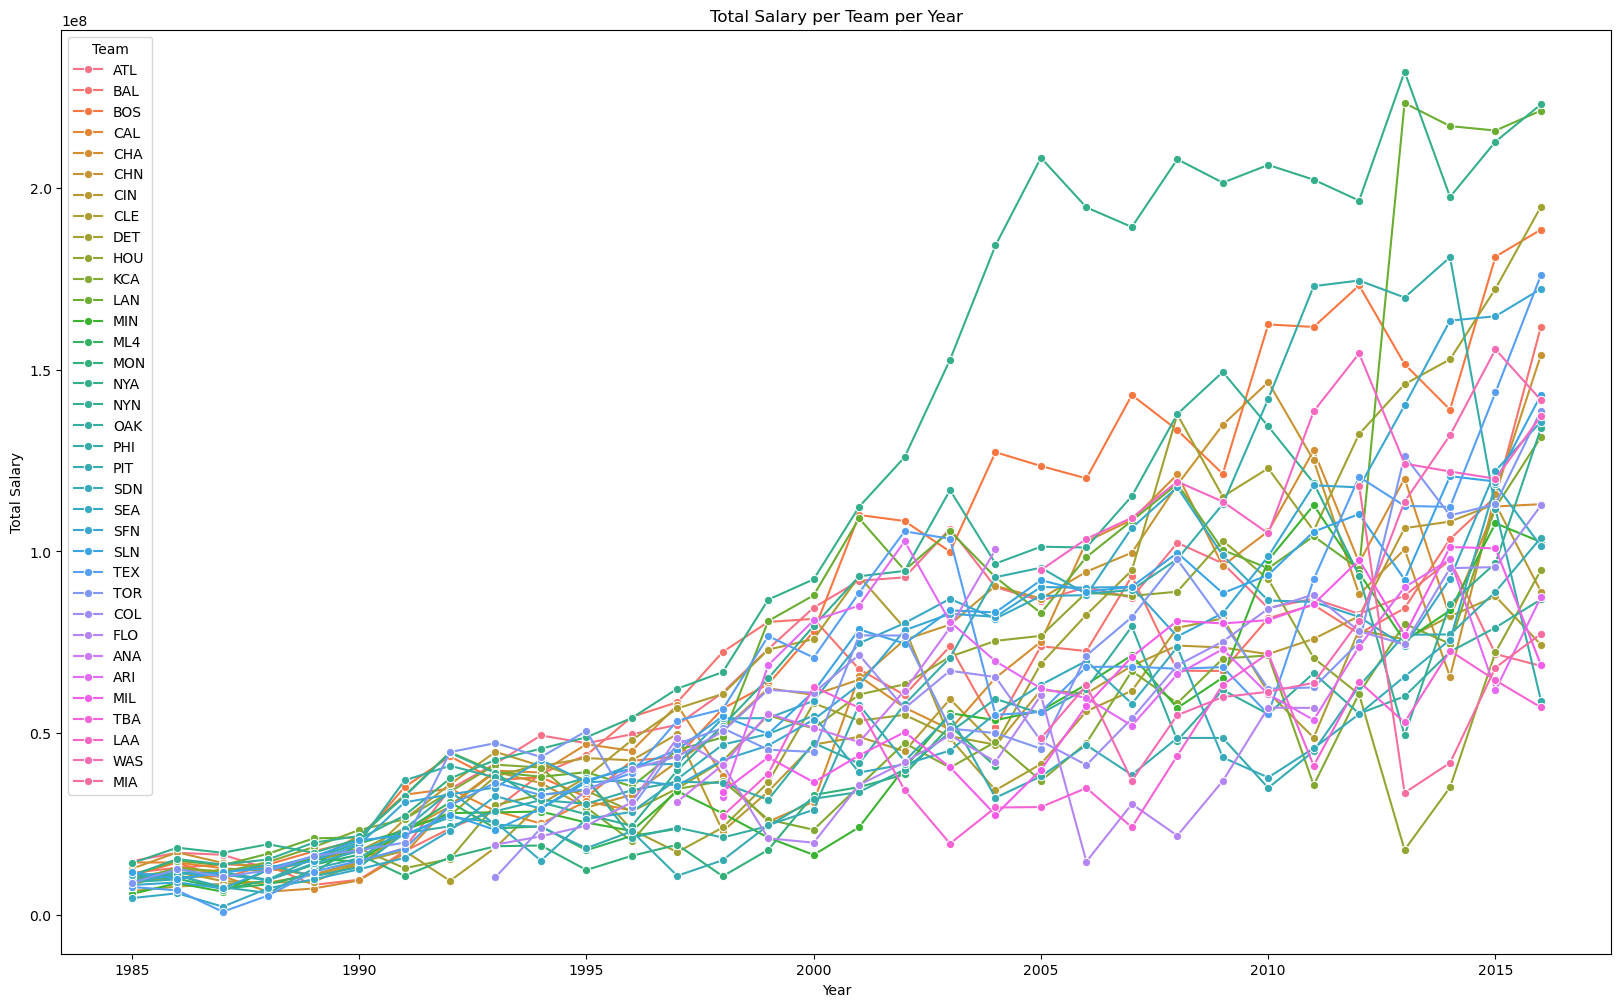

In [13]:
# investigate plot of teams salary per year
salary_per_team_year = salary.groupby(['yearID', 'teamID'])['salary'].sum().reset_index()

# plot the data
plt.figure(figsize=(20, 12))
sns.lineplot(data=salary_per_team_year, x='yearID', y='salary', hue='teamID', marker='o')
plt.title('Total Salary per Team per Year')
plt.xlabel('Year')
plt.ylabel('Total Salary')
plt.legend(title='Team')
plt.show()


In [14]:
# this graph can indicate the growth of salary caps in the MLB

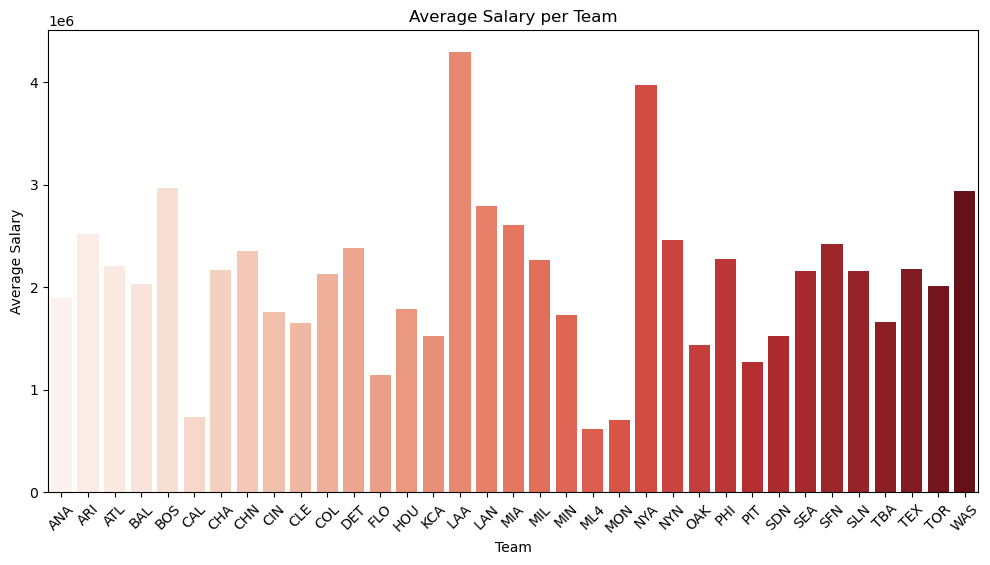

In [91]:
# Observe bar plot of average salary per team
avg_salary_per_team = salary.groupby('teamID')['salary'].mean().reset_index()
# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_salary_per_team, x='teamID', y='salary', hue='teamID', palette='Reds')
plt.title('Average Salary per Team')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

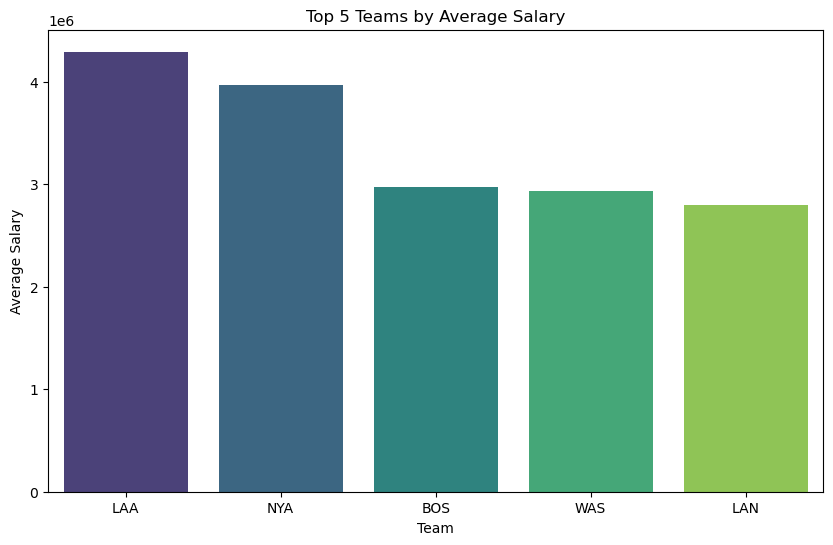

In [16]:
top_5_teams = avg_salary_per_team.nlargest(5, 'salary')
# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_teams, x='teamID', y='salary', hue='teamID', palette='viridis')
plt.title('Top 5 Teams by Average Salary')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.show()

In [95]:
# filter batting data and create batting average column 
# Also lets look at batting data specific to teams to make sure everything is normal looking
batting_after_1997 = batting[batting['yearID']>1997]
batting_after_1997["AVG"] = batting_after_1997["H"]/batting_after_1997["AB"]
batting_avg_per_team = batting_after_1997.groupby('teamID')['AVG'].mean().reset_index()
batting_avg_per_team.head()

/var/folders/76/qkbz00095_gc56g08g9mz54m0000gn/T/ipykernel_21074/2362775870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batting_after_1997["AVG"] = batting_after_1997["H"]/batting_after_1997["AB"]


,teamID,AVG
0,ANA,0.222701
1,ARI,0.195365
2,ATL,0.192031
3,BAL,0.207233
4,BOS,0.209615


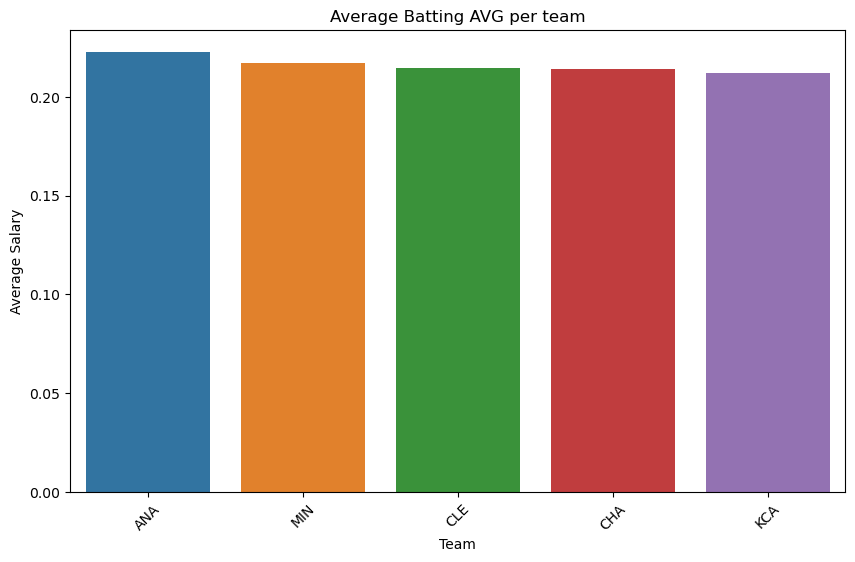

In [18]:
# plot batting average per team
top_5_teams = batting_avg_per_team.nlargest(5, 'AVG')
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_teams, x='teamID', y='AVG', hue='teamID')
plt.title('Average Batting AVG per team')
plt.xlabel('Team')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.show()

### Conclusion

The investigation explores multiple aspects of Major League Baseball performance, focusing on the relationship between a franchise's salary and its success, as well as the correlation between walks and runs. The connection between walks and runs is intuitive, as more players reaching base increases the likelihood of scoring. Walks, being a common way to reach base, naturally contribute to this relationship, making it a fundamental aspect of the game. Correlations of walks and 2B were standouts in the dataset. 

A scatterplot analysis was conducted to determine the likelihood of a team making the playoffs based on its win percentage. This visualization provided insights into the threshold of success required for postseason qualification, highlighting a clear pattern where higher win percentages consistently lead to playoff appearances.

In addition, heatmaps were used to analyze the relationships within team and player statistics. One heatmap focused on team-level metrics, providing a comprehensive overview of how various team statistics correlate with each other and overall performance. The other heatmap examined batting statistics, shedding light on individual contributions to team success. These visual tools helped identify both expected and unexpected relationships in the data. Clustering analysis provided valuable insights by grouping MLB teams based on performance metrics such as win percentage, runs, and walks. This unsupervised learning approach revealed natural groupings of teams, distinguishing high-performing franchises from average and lower-performing ones. 

Another critical aspect of the investigation was the trend of increasing salary caps in Major League Baseball. The analysis showed that franchises with higher payrolls are more likely to win the World Series, underscoring the growing necessity of substantial financial investment to achieve championship success. This trend reflects the evolving financial dynamics of the sport, where competitive spending often equates to better player acquisition and ultimately, better team performance.

The data provided a robust foundation for exploring the factors that drive success in baseball, offering actionable insights for teams aiming to optimize performance.